#UK Inflation Prediction

Given for the following dataset, using time-series forecasting,predict the inflation rise in United Kingdom.

Dataset-https://www.kaggle.com/datasets/scarfsman/uk-inflation-data-1989-2022/data

In [1]:
#loading the dataset
!pip install opendatasets

In [2]:
import opendatasets as od
import pandas as pd

od.download("https://www.kaggle.com/datasets/scarfsman/uk-inflation-data-1989-2022/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abhinavprasoon141
Your Kaggle Key: ··········


100%|██████████| 2.61k/2.61k [00:00<00:00, 5.40MB/s]

In [3]:
month_df=pd.read_csv("/content/uk-inflation-data-1989-2022/Inflation by Month.csv")
quarter_df=pd.read_csv("/content/uk-inflation-data-1989-2022/Inflation by Quarter.csv")
year_df=pd.read_csv("/content/uk-inflation-data-1989-2022/Inflation by Year.csv")

In [4]:
month_df.head()

,Year,Month,Inflation
0,1989,JAN,5.7
1,1989,FEB,5.8
2,1989,MAR,5.9
3,1989,APR,5.6
4,1989,MAY,5.9


In [5]:
quarter_df.head()

,Year,Quarter,Inflation
0,1989,Q1,5.8
1,1989,Q2,5.8
2,1989,Q3,5.6
3,1989,Q4,5.7
4,1990,Q1,6.1


In [6]:
year_df.head()

,Year,Inflation
0,1989,5.7
1,1990,8.0
2,1991,7.5
3,1992,4.6
4,1993,2.6


##1.Exploratory Data Analysis

In [7]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

In [8]:
#converting month into a datetime format
month_to_date = {
    "JAN": '-01-01',
    "FEB": '-02-01',
    "MAR": '-03-01',
    "APR": '-04-01',
    "MAY": '-05-01',
    "JUN": '-06-01',
    "JUL": '-07-01',
    "AUG": '-08-01',
    "SEP": '-09-01',
    "OCT": '-10-01',
    "NOV": '-11-01',
    "DEC": '-12-01'
}

month_df['Month'] = month_df['Month'].map(month_to_date)
month_df['Year'] = month_df['Year'].astype(str) + month_df['Month']
month_df['Year'] = pd.to_datetime(month_df['Year'], yearfirst=True)
month_df.rename(columns={'Year': 'Datetime'}, inplace=True)
month_df.drop(columns='Month', inplace=True)

In [9]:
month_df.head()

,Datetime,Inflation
0,1989-01-01,5.7
1,1989-02-01,5.8
2,1989-03-01,5.9
3,1989-04-01,5.6
4,1989-05-01,5.9


In [10]:
#Plotting the inflation increase
fig=go.Figure()
fig.add_trace(go.Scatter(x=month_df['Datetime'],
                         y=month_df['Inflation'],
                         mode='lines', name='Inflation_Increase'))
fig.update_layout(title="Inflation Increase",
                  xaxis_title="Time Period",
                  yaxis_title="Inflation Rate")
fig.show()

<Axes: >

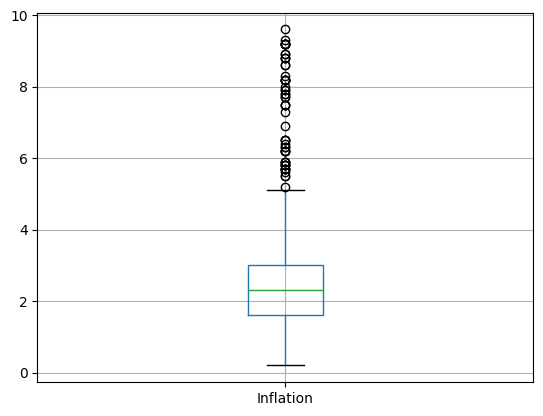

In [11]:
month_df.boxplot()

<Figure size 640x480 with 0 Axes>

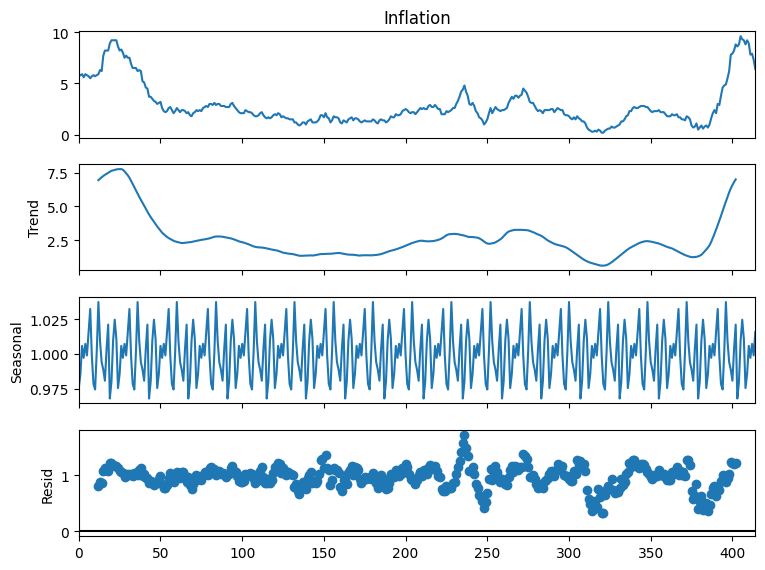

In [12]:
#seasonal decomposition check
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(month_df["Inflation"], model='multiplicative', period=24)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(8, 6)
fig.show()

Since, there is a seasonal pattern present in our dataset, we will be using SARIMA model to do our predictions. Before using SARIMA, we need to find p,d, and q values.

##2.Forecasting using SARIMA

In [13]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.0 MB/s eta 0:00:00


In [14]:
#calculating p,d and q values
from pmdarima.arima import auto_arima
model = auto_arima(month_df['Inflation'], seasonal=True, m=52, suppress_warnings=True)
print(model.order)

(2, 1, 3)


In [15]:
p,d,q=2,1,3

Now, let's do the manual way of finding p,d and q. Since, data is sasonal, we take **d=0**.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

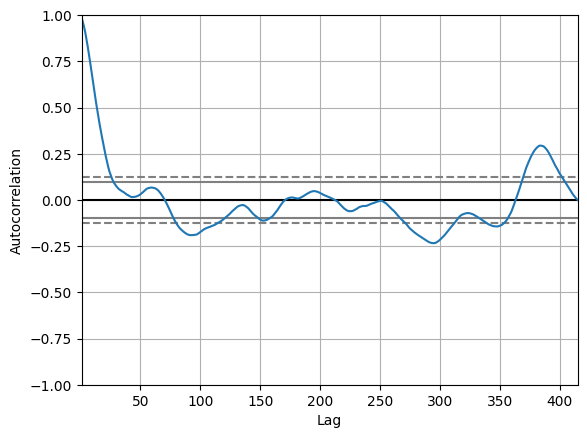

In [16]:
#calculating p value
pd.plotting.autocorrelation_plot(month_df["Inflation"])

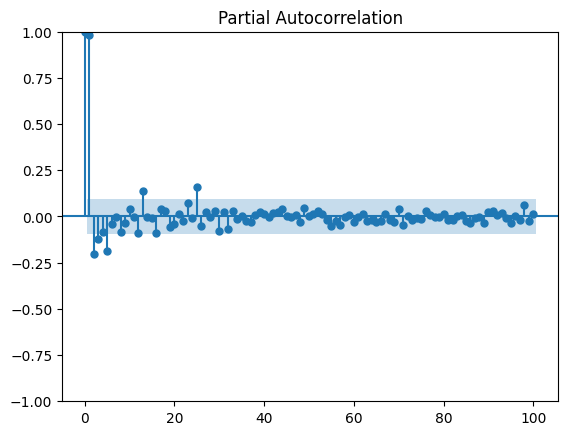

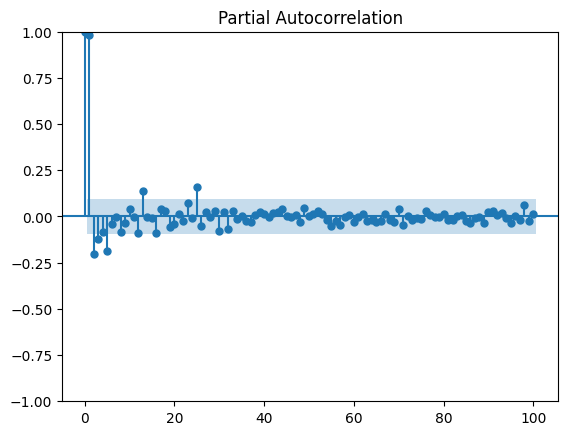

In [17]:
#Calculating q value
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(month_df["Inflation"], lags = 100)

In [18]:
#Using SARIMA to predict
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(month_df["Inflation"], order=(p, d, q),
                seasonal_order=(p, d, q, 52))
fitted = model.fit()
print(fitted.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                          Inflation   No. Observations:                  415
Model:             SARIMAX(2, 1, 3)x(2, 1, 3, 52)   Log Likelihood                 -82.223
Date:                            Tue, 03 Oct 2023   AIC                            186.446
Time:                                    16:23:27   BIC                            229.255
Sample:                                         0   HQIC                           203.464
                                            - 415                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6191      0.043     38.091      0.000       1.536       1.702
ar.L2         -0.7896      0.039   

In [21]:
#making predictions
predictions = fitted.predict(len(month_df), len(month_df)+100)
print(predictions)

415     6.285094
416     6.176505
417     6.098512
418     6.019552
419     5.836356
         ...    
511    11.448315
512    11.229564
513    11.410319
514    11.244137
515    10.695576
Name: predicted_mean, Length: 101, dtype: float64


In [27]:
type(predictions)

pandas.core.series.Series

In [26]:
month_df.tail()

,Datetime,Inflation
410,2023-03-01,8.9
411,2023-04-01,7.8
412,2023-05-01,7.9
413,2023-06-01,7.3
414,2023-07-01,6.4


In [29]:
#converting into the suitable format
import datetime
start_date = datetime.date(2023, 8, 1)
date_range = [start_date + datetime.timedelta(days=i) for i in range(100)]

df = pd.DataFrame({'Datetime': date_range, 'Inflation': predictions[:100]})

df.head()

,Datetime,Inflation
415,2023-08-01,6.285094
416,2023-08-02,6.176505
417,2023-08-03,6.098512
418,2023-08-04,6.019552
419,2023-08-05,5.836356


In [20]:
len(month_df)

415

In [32]:
#plotting forecasted results
# Create figure
fig = go.Figure()

# Add training data line plot
fig.add_trace(go.Scatter(
    x=month_df["Datetime"],
    y=month_df['Inflation'],
    mode='lines',
    name='Actual Data',
    line=dict(color='blue')
))

# Add predictions line plot
fig.add_trace(go.Scatter(
    x=df["Datetime"],
    y=df["Inflation"],
    mode='lines',
    name='Predictions',
    line=dict(color='green')
))

fig.update_layout(
    title="UK Inflation - Actual Data Data and Predictions",
    xaxis_title="Date",
    yaxis_title="Inflation",
    legend_title="Data"
)

pio.show(fig)